<a href="https://colab.research.google.com/github/RyanTokManMokMTM/NLP_Tranning/blob/master/NLP_Trainning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!git clone https://github.com/fxsjy/jieba.git

fatal: destination path 'jieba' already exists and is not an empty directory.


In [40]:
!cd jieba/
!ls

build	    hw1-dataset.txt    LICENSE	    setup.py
Changelog   hw1-dataset.txt.1  MANIFEST.in  stop_words.txt
extra_dict  jieba	       README.md    test


In [41]:
pip install paddlepaddle-tiny==1.6.1

In [42]:
%cd jieba/

/content/jieba/jieba


In [43]:
!python setup.py install

python3: can't open file 'setup.py': [Errno 2] No such file or directory


# TF-IDF

**Term frequency**

In [46]:
!wget https://raw.githubusercontent.com/cjwu/cjwu.github.io/master/courses/nlp/hw1-dataset.txt

--2021-07-21 20:12:38--  https://raw.githubusercontent.com/cjwu/cjwu.github.io/master/courses/nlp/hw1-dataset.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34079536 (32M) [text/plain]
Saving to: ‘hw1-dataset.txt’

hw1-dataset.txt     100%[===================>]  32.50M   171MB/s    in 0.2s    

2021-07-21 20:12:39 (171 MB/s) - ‘hw1-dataset.txt’ saved [34079536/34079536]



In [47]:
#remove all the space and tab etc
import re
#read file
with open("hw1-dataset.txt") as txt:
  p = txt.readlines()


# result = []
# for i in p:
#   result.append(i.replace(" ","").replace("\t","").replace("\n",""))

result = [re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9]', "" , i) for i in p]


In [48]:
'''
TODO
calculate each line and add to dict for counter the word
'''
#flag is used to save the line count
counter = {}
df = {}
paraList = []
for para in result:
#cut the work using jieba and iterate
  x = jieba.cut(para, cut_all=False)
  current = {}
  tempRecord = {}
  for word in x: 
    if word not in tempRecord:
      tempRecord[word] = 1
      if word in df: 
       df[word] += 1
      else:
       df[word] = 1 

    if word in current: 
      current[word] += 1
    else:
      current[word] = 1

    if word in counter: 
      counter[word] += 1
    else:
      counter[word] = 1
  paraList.append(current)



In [62]:
temp = counter.copy()
tempParaList = paraList.copy()
sortedtemp = sorted(temp.items(), key=lambda x:x[1])
top_100_Word = sortedtemp[-100:-1]


In [50]:
#calculate the top 100 term frequency
'''
TODO
WE NOW GET TOP 100 High frequency words
ACCROUNDING TO THOSE WORD TO CALCULATE EACH
currenr paragraph time / total
'''
import math
# calculate the tf-idf for each text
# figure out top 100
totalDoc = len(result)
IDF_List = {}
for wordList in paraList:
  #calcualte tf
  
  for currentKey,currentValue in wordList.items():
    current = {}
    totalCurrentWords = counter[currentKey] #get 
    currentWordsSize = currentValue
    totalDocuWordLine = df[currentKey]

    DF = totalDoc / totalDocuWordLine
    TF = currentValue / totalCurrentWords
    IDF = math.log(DF)
    TF_IDF = TF*IDF
    IDF_List[currentKey] = TF_IDF


In [66]:

idfSortedTemp = sorted(IDF_List.items(), key=lambda x:x[1])
idfSortedTemp.reverse()
top_100_idf = idfSortedTemp[-100:-1]
print(top_100_idf)
print(top_100_Word)


[('應該', 0.0006375565441614018), ('沒有', 0.0006354784240511624), ('長', 0.0006196534918350913), ('喜歡', 0.0006136792962079163), ('嘛', 0.0006025622970433163), ('死', 0.0006000515906081251), ('年', 0.0005891222156645813), ('很多', 0.0005412035225938704), ('叫', 0.0005316814225589085), ('那', 0.0005280423712827018), ('自己', 0.0005150743454475629), ('能', 0.0005079923127178843), ('大家', 0.0005046835449094458), ('小', 0.0004999315817562008), ('得', 0.0004945069153383922), ('阿', 0.000492841450513118), ('打', 0.000490217808064225), ('卦', 0.0004844866302221763), ('讓', 0.0004822499828176007), ('不要', 0.00048149333502224166), ('再', 0.0004780656743826984), ('現在', 0.0004717744413874677), ('日本', 0.00046946858553217435), ('一樣', 0.000460939504205968), ('到底', 0.0004607619043184527), ('聽', 0.00045876502912583583), ('女生', 0.00045793430166108626), ('怎樣', 0.00044301904707206083), ('和', 0.00043363098138895616), ('辦', 0.00042800904438535864), ('較', 0.0004208642164308935), ('話', 0.00041891814860158633), ('時候', 0.000405547657

**Graph**

In [52]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27794 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38263 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21916 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27489 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22043 missing from current font.
  font.set_

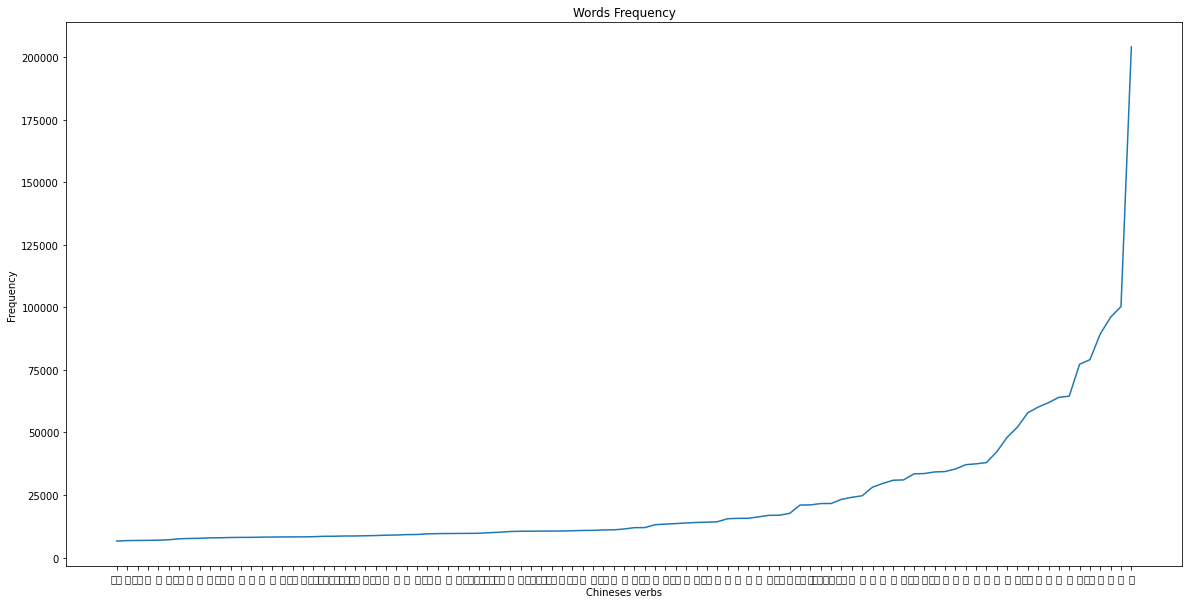

['沒有', '長', '喜歡', '嘛', '死', '年', '很多', '那', '叫', '能', '大家', '小', '得', '阿', '卦', '打', '讓', '不要', '再', '現在', '到底', '一樣', '日本', '女生', '聽', '怎樣', '和', '辦', '較', '話', '時候', '又', '做', '用', '這樣', '有人', '中國', '一堆', '把', '喔', '還是', '一個', '不會', '該', '如果', '對', '啦', '就是', '最', '買', '上', '不是', '誰', '多', '自己', '才', '幹', '知道', '比', '他', '吧', '後', '錢', '來', '真的', '看', '肥宅', '想', '是不是', '到', '可以', '吃', '也', '啊', '被', '很', '為', '怎麼', '跟', '台灣', '會', '去', '要', '說', '不', '好', '就', '我', '什麼', '人', '在', '都', '你', '了', '八卦', '嗎', '沒', '是', '有']


In [77]:
#Frequency
frq_x = []
frq_y = []

for data in top_100_Word:
  frq_x.append(data[0])
  frq_y.append(data[1])

plt.plot(frq_x,frq_y)
plt.title("Words Frequency")
plt.xlabel("Chineses verbs")
plt.ylabel("Frequency")
plt.rcParams["figure.figsize"] = (20,10)
plt.show()
print(frq_x)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35442 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27794 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38263 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21916 missing from current font.
  font.set_

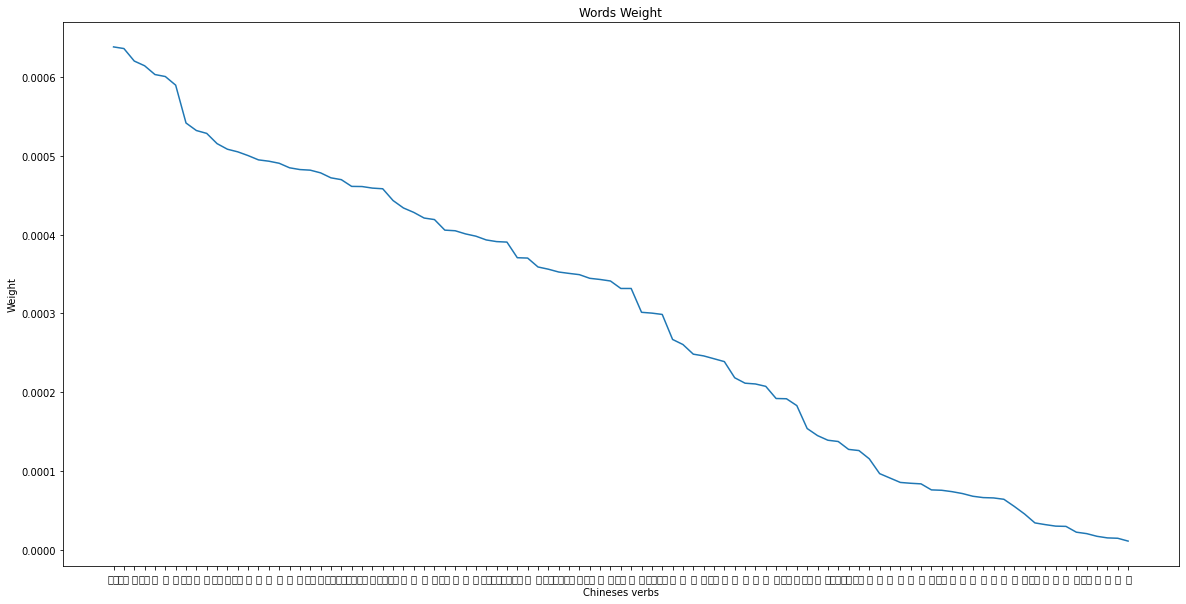

['沒有', '長', '喜歡', '嘛', '死', '年', '很多', '那', '叫', '能', '大家', '小', '得', '阿', '卦', '打', '讓', '不要', '再', '現在', '到底', '一樣', '日本', '女生', '聽', '怎樣', '和', '辦', '較', '話', '時候', '又', '做', '用', '這樣', '有人', '中國', '一堆', '把', '喔', '還是', '一個', '不會', '該', '如果', '對', '啦', '就是', '最', '買', '上', '不是', '誰', '多', '自己', '才', '幹', '知道', '比', '他', '吧', '後', '錢', '來', '真的', '看', '肥宅', '想', '是不是', '到', '可以', '吃', '也', '啊', '被', '很', '為', '怎麼', '跟', '台灣', '會', '去', '要', '說', '不', '好', '就', '我', '什麼', '人', '在', '都', '你', '了', '八卦', '嗎', '沒', '是', '有']
['應該', '沒有', '長', '喜歡', '嘛', '死', '年', '很多', '叫', '那', '自己', '能', '大家', '小', '得', '阿', '打', '卦', '讓', '不要', '再', '現在', '日本', '一樣', '到底', '聽', '女生', '怎樣', '和', '辦', '較', '話', '時候', '又', '做', '用', '這樣', '中國', '有人', '一堆', '喔', '把', '一個', '還是', '不會', '該', '如果', '對', '啦', '就是', '最', '上', '肥宅', '不是', '誰', '多', '才', '幹', '知道', '比', '他', '後', '吧', '錢', '來', '真的', '看', '台灣', '想', '到', '是不是', '吃', '可以', '也', '啊', '被', '很', '為', '我', '跟', '怎麼', '會', '去', '人', '要', '說', '不', '好'

In [78]:
#weight
weight_x =[]
weight_y = []

for data in top_100_idf:
  weight_x.append(data[0])
  weight_y.append(data[1])

plt.plot(weight_x,weight_y)
plt.title("Words Weight")
plt.xlabel("Chineses verbs")
plt.ylabel("Weight")
plt.rcParams["figure.figsize"] = (20,10)
plt.show()
print(frq_x)
print(weight_x)